<a href="https://colab.research.google.com/github/Rohit2303A510J0/ADM_PROJECT/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing the dataset and analysing the dataset

In [19]:
df = pd.read_csv("https://media.githubusercontent.com/media/Rohit2303A510J0/ADM_PROJECT/refs/heads/main/survey_results_public.csv")

<ipython-input-19-1f99121347c9>:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://media.githubusercontent.com/media/Rohit2303A510J0/ADM_PROJECT/refs/heads/main/survey_results_public.csv")


In [20]:
# Feature selection

selected_columns = [
    'ConvertedSalary',         # Target variable
    'Country',                 # Location may affect pay
    'FormalEducation',         # Education level
    'UndergradMajor',          # Field of study
    'YearsCodingProf',         # Experience
    'Employment',              # Work status (e.g., full-time)
    'CompanySize',             # Company scale
    'DevType',                 # Type of developer roles
    'LanguageWorkedWith',      # Programming languages known
    'Gender',                  # for deeper analysis
    'Age'                      # Age can reflect experience
]

# Drop all other columns
df = df[selected_columns]

# Drop rows where target value (salary) is missing
df.dropna(subset=['ConvertedSalary'], inplace=True)

# Display shape after cleanu
print(f"Dataset shape after dropping irrelevant columns and missing salary: {df.shape}")

Dataset shape after dropping irrelevant columns and missing salary: (47702, 11)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47702 entries, 1 to 89965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ConvertedSalary     47702 non-null  float64
 1   Country             47702 non-null  object 
 2   FormalEducation     47008 non-null  object 
 3   UndergradMajor      42383 non-null  object 
 4   YearsCodingProf     46965 non-null  object 
 5   Employment          47548 non-null  object 
 6   CompanySize         40960 non-null  object 
 7   DevType             47365 non-null  object 
 8   LanguageWorkedWith  46482 non-null  object 
 9   Gender              44531 non-null  object 
 10  Age                 44837 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.4+ MB


In [22]:
df.describe()

,ConvertedSalary
count,4.770200e+04
mean,9.578086e+04
std,2.023482e+05
min,0.000000e+00
25%,2.384400e+04
50%,5.507500e+04
75%,9.300000e+04
max,2.000000e+06


In [23]:
df.dtypes

,0
ConvertedSalary,float64
Country,object
FormalEducation,object
UndergradMajor,object
YearsCodingProf,object
Employment,object
CompanySize,object
DevType,object
LanguageWorkedWith,object
Gender,object


In [24]:
df.head(5)

,ConvertedSalary,Country,FormalEducation,UndergradMajor,YearsCodingProf,Employment,CompanySize,DevType,LanguageWorkedWith,Gender,Age
1,70841.0,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",18-20 years,Employed full-time,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Male,35 - 44 years old
4,21426.0,South Africa,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",0-2 years,Employed full-time,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Male,18 - 24 years old
5,41671.0,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",3-5 years,Employed full-time,10 to 19 employees,Back-end developer;Database administrator;Fron...,Java;JavaScript;Python;TypeScript;HTML;CSS,Male,18 - 24 years old
6,120000.0,United States,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",0-2 years,Employed full-time,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,JavaScript;HTML;CSS,Male,18 - 24 years old
8,250000.0,United States,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,21-23 years,Employed full-time,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Male,35 - 44 years old


In [25]:
df.isnull().sum()

,0
ConvertedSalary,0
Country,0
FormalEducation,694
UndergradMajor,5319
YearsCodingProf,737
Employment,154
CompanySize,6742
DevType,337
LanguageWorkedWith,1220
Gender,3171


## Data Preprocessing

# Handling missing values and noisy data

In [26]:
def convert_experience(val):
    if pd.isnull(val):
        return np.nan

    val = str(val).strip().lower().replace(" years", "").replace(" year", "")

    if 'or more' in val:
        return 30  # Assigning 30 for "30 or more years"

    if '-' in val:
        try:
            low, high = val.split('-')
            return (float(low) + float(high)) / 2
        except:
            return np.nan

    try:
        return float(val)
    except:
        return np.nan


df['YearsCodingProf'] = df['YearsCodingProf'].apply(convert_experience)
df['YearsCodingProf'] = df['YearsCodingProf'].fillna(df['YearsCodingProf'].median())

for col in ['FormalEducation', 'UndergradMajor', 'Employment', 'CompanySize',
            'DevType', 'LanguageWorkedWith', 'Gender', 'Age']:
    df[col] = df[col].fillna("Unknown")

# 1. Clean Country - move ambiguous/truncated to "Other"
ambiguous_countries = [
    "Iran, Islamic Republic of...",
    "Venezuela, Bolivarian Republic of...",
    "Other Country (Not Listed Above)",
    "Côte d'Ivoire"
]

df['Country'] = df['Country'].apply(lambda x: "Other" if x in ambiguous_countries else x)

top_countries = df['Country'].value_counts().nlargest(60).index
df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

# 2. Clean FormalEducation
education_mapping = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s degree",
    "Some college/university study without earning a degree": "Some college study",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master’s degree",
    "Associate degree": "Associate degree",
    "Professional degree (JD, MD, etc.)": "Professional degree",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doctoral degree",
    "Primary/elementary school": "Primary school",
    "I never completed any formal education": "No degree",
    "Unknown": "No degree"
}

df['FormalEducation'] = df['FormalEducation'].map(education_mapping)

undergrad_mapping = {
    "Computer science, computer engineering, or software engineering": "CS/Software Engineering",
    "Web development or web design": "CS/Software Engineering",
    "Information systems, information technology, or system administration": "CS/Software Engineering",
    "Mathematics or statistics": "Mathematics/Statistics",
    "Another engineering discipline (ex. civil, electrical, mechanical)": "Other Engineering",
    "A natural science (ex. biology, chemistry, physics)": "Natural Science",
    "A social science (ex. anthropology, psychology, political science)": "Social Science",
    "A business discipline (ex. accounting, finance, marketing)": "Business",
    "A humanities discipline (ex. literature, history, philosophy)": "Humanities",
    "Fine arts or performing arts (ex. graphic design, music, studio art)": "Arts",
    "A health science (ex. nursing, pharmacy, radiology)": "Health Science",
    "I never declared a major": "No Major",
    "Unknown": "No Major"
}

df['UndergradMajor'] = df['UndergradMajor'].map(undergrad_mapping)

employment_mapping = {
    "Employed full-time": "Employed",
    "Employed part-time": "Employed",
    "Independent contractor, freelancer, or self-employed": "Employed",
    "Not employed, and not looking for work": "Not employed",
    "Not employed, but looking for work": "Not employed",
    "Retired": "Not employed",
    "Unknown": "Not employed"
}

df['Employment'] = df['Employment'].map(employment_mapping)

company_size_mapping = {
    'Fewer than 10 employees': 'Small',
    '10 to 19 employees': 'Small',
    '20 to 99 employees': 'Small',
    '100 to 499 employees': 'Medium',
    '500 to 999 employees': 'Medium',
    '1,000 to 4,999 employees': 'Large',
    '5,000 to 9,999 employees': 'Large',
    '10,000 or more employees': 'Large',
    'Unknown': 'Unknown'
}

df['CompanySize'] = df['CompanySize'].map(company_size_mapping)

most_common_size = df.loc[df['CompanySize'] != 'Unknown', 'CompanySize'].mode()[0]
df['CompanySize'] = df['CompanySize'].replace('Unknown', most_common_size)

def simplify_gender(g):
    if g == 'Unknown':
        return 'Unknown'
    parts = g.lower().split(';')
    if len(parts) == 1:
        if 'male' in parts[0] and 'female' not in parts[0] and 'transgender' not in parts[0] and 'non-binary' not in parts[0]:
            return 'Male'
        elif 'female' in parts[0] and 'male' not in parts[0] and 'transgender' not in parts[0] and 'non-binary' not in parts[0]:
            return 'Female'
    if 'male' in parts and len(parts) == 1:
        return 'Male'
    if 'female' in parts and len(parts) == 1:
        return 'Female'
    return 'Other'

df['Gender'] = df['Gender'].apply(simplify_gender)

gender_mode = df.loc[df['Gender'] != 'Unknown', 'Gender'].mode()[0]
df['Gender'] = df['Gender'].replace('Unknown', gender_mode)

age_mode = df.loc[df['Age'] != 'Unknown', 'Age'].mode()[0]
df['Age'] = df['Age'].replace('Unknown', age_mode)

def simplify_devtype(dev_string):
    if pd.isnull(dev_string):
        return 'Other'

    dev_string = dev_string.lower()
    categories = set()

    if 'developer' in dev_string or 'engineer' in dev_string:
        categories.add('Developer')
    if 'data' in dev_string or 'analyst' in dev_string or 'scientist' in dev_string:
        categories.add('Data Professional')
    if 'qa' in dev_string or 'test' in dev_string:
        categories.add('QA/Testing')
    if 'system administrator' in dev_string or 'devops' in dev_string:
        categories.add('SysAdmin/DevOps')
    if 'designer' in dev_string:
        categories.add('Designer')
    if 'educator' in dev_string or 'academic' in dev_string or 'researcher' in dev_string:
        categories.add('Educator/Academic')
    if 'c-suite' in dev_string or 'ceo' in dev_string or 'cto' in dev_string:
        categories.add('Executive')
    if 'student' in dev_string:
        categories.add('Student')
    if 'marketing' in dev_string or 'sales' in dev_string:
        categories.add('Marketing/Sales')

    if not categories:
        return 'Other'
    else:
        return ';'.join(sorted(categories))

df['DevType'] = df['DevType'].apply(simplify_devtype)

df['DevType'] = df['DevType'].fillna('Other')

df['LanguageWorkedWith'] = df['LanguageWorkedWith'].fillna('')

all_languages = df['LanguageWorkedWith'].str.split(';')
language_counts = Counter(lang for sublist in all_languages for lang in sublist)
top_languages = [lang for lang, _ in language_counts.most_common(10)]

# One-hot encode top languages
for lang in top_languages:
    df[f'knows_{lang}'] = df['LanguageWorkedWith'].apply(lambda x: int(lang in x.split(';')))

# Add NumLanguagesWorkedWith
df['NumLanguagesWorkedWith'] = df['LanguageWorkedWith'].apply(lambda x: len(x.split(';')) if x else 0)

# Drop original column
df.drop('LanguageWorkedWith', axis=1, inplace=True)


# Outliers handling

- ConvertedSalary column

Before outlier removal:
count    4.770200e+04
mean     9.578086e+04
std      2.023482e+05
min      0.000000e+00
25%      2.384400e+04
50%      5.507500e+04
75%      9.300000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64


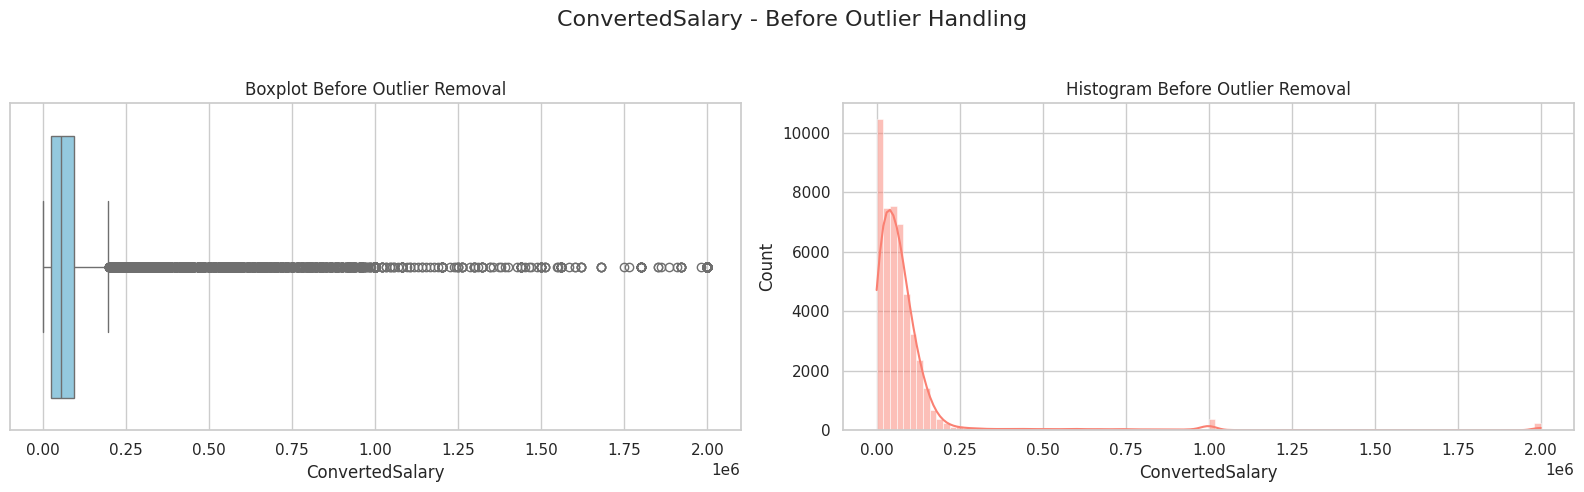


After outlier removal:
count     45069.000000
mean      58025.118662
std       42872.600692
min           0.000000
25%       22032.000000
50%       51408.000000
75%       84816.000000
max      196000.000000
Name: ConvertedSalary, dtype: float64


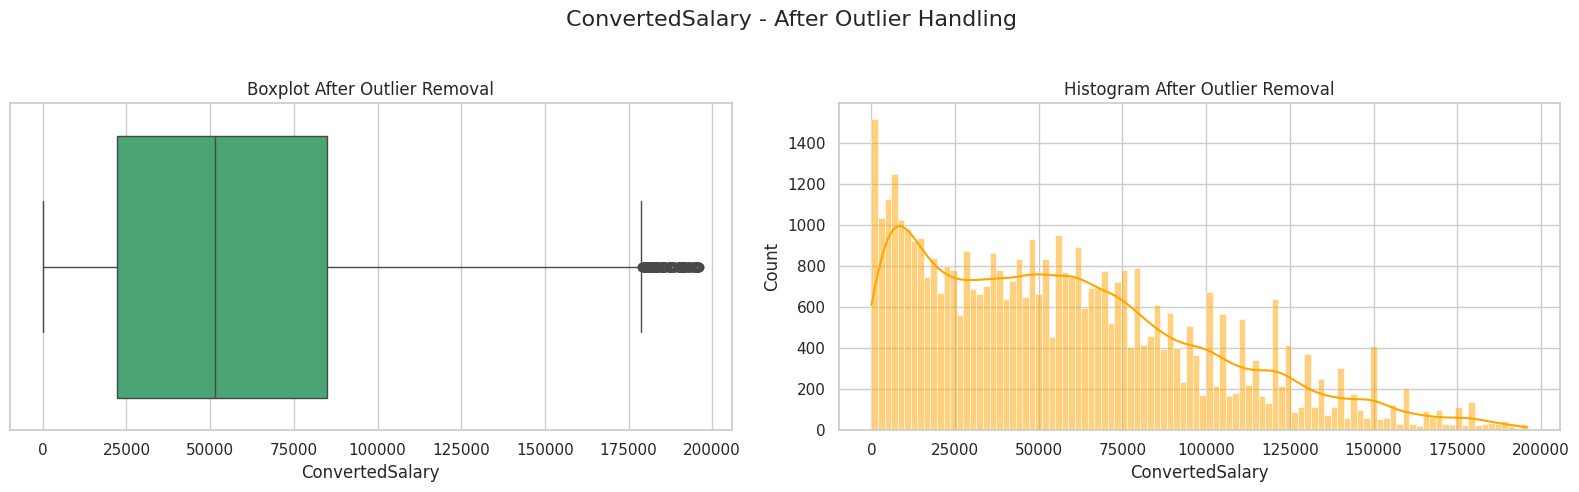

In [27]:
# Set the style
sns.set(style="whitegrid")

print("Before outlier removal:")
print(df['ConvertedSalary'].describe())

# ----------- BEFORE Outlier Removal -----------

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("ConvertedSalary - Before Outlier Handling", fontsize=16)

# Boxplot before
sns.boxplot(x=df['ConvertedSalary'], ax=axes[0], color='skyblue')
axes[0].set_title("Boxplot Before Outlier Removal")

# Histogram before
sns.histplot(df['ConvertedSalary'], bins=100, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Histogram Before Outlier Removal")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

# ----------- OUTLIER REMOVAL -----------

Q1 = df['ConvertedSalary'].quantile(0.25)
Q3 = df['ConvertedSalary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['ConvertedSalary'] >= lower_bound) & (df['ConvertedSalary'] <= upper_bound)]

# ----------- AFTER Outlier Removal -----------


print("\nAfter outlier removal:")
print(df['ConvertedSalary'].describe())

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("ConvertedSalary - After Outlier Handling", fontsize=16)

# Boxplot after
sns.boxplot(x=df['ConvertedSalary'], ax=axes[0], color='mediumseagreen')
axes[0].set_title("Boxplot After Outlier Removal")

# Histogram after
sns.histplot(df['ConvertedSalary'], bins=100, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Histogram After Outlier Removal")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Exploratory Data Analysis

In [28]:
# Print missing values for each column
print(df.isnull().sum())

ConvertedSalary           0
Country                   0
FormalEducation           0
UndergradMajor            0
YearsCodingProf           0
Employment                0
CompanySize               0
DevType                   0
Gender                    0
Age                       0
knows_JavaScript          0
knows_HTML                0
knows_CSS                 0
knows_SQL                 0
knows_Bash/Shell          0
knows_Java                0
knows_Python              0
knows_C#                  0
knows_PHP                 0
knows_C++                 0
NumLanguagesWorkedWith    0
dtype: int64



Categorical Features Distribution:


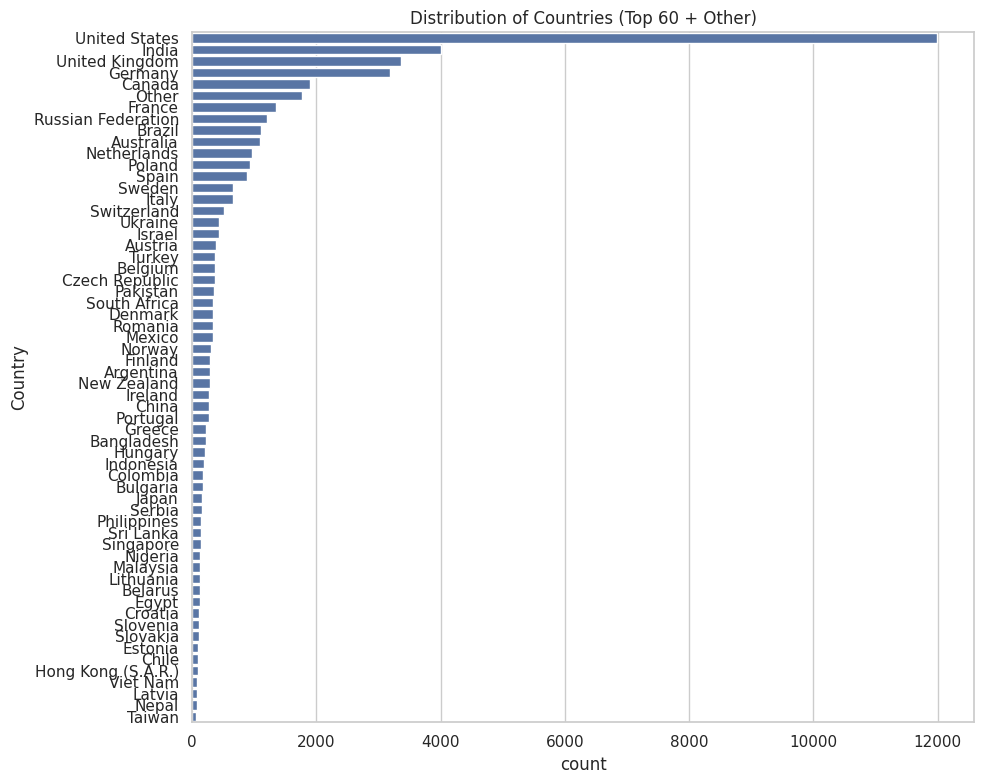

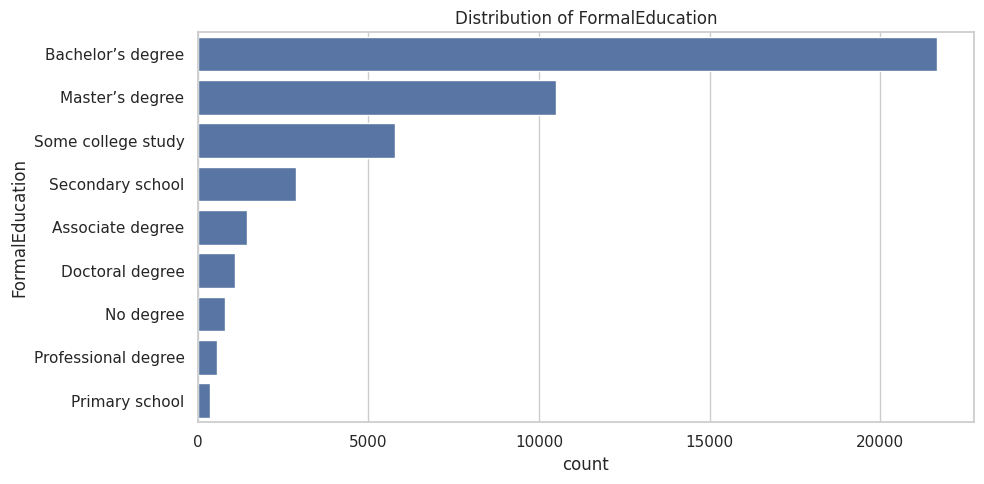

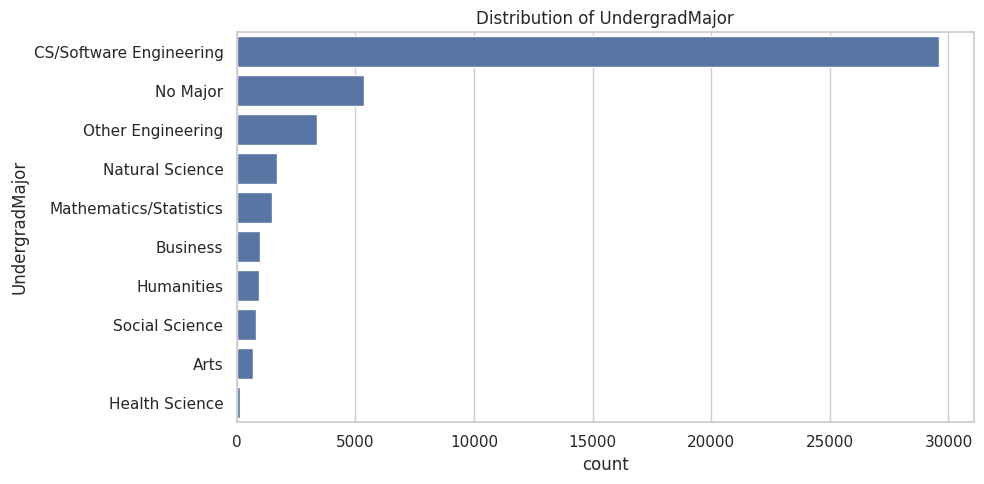

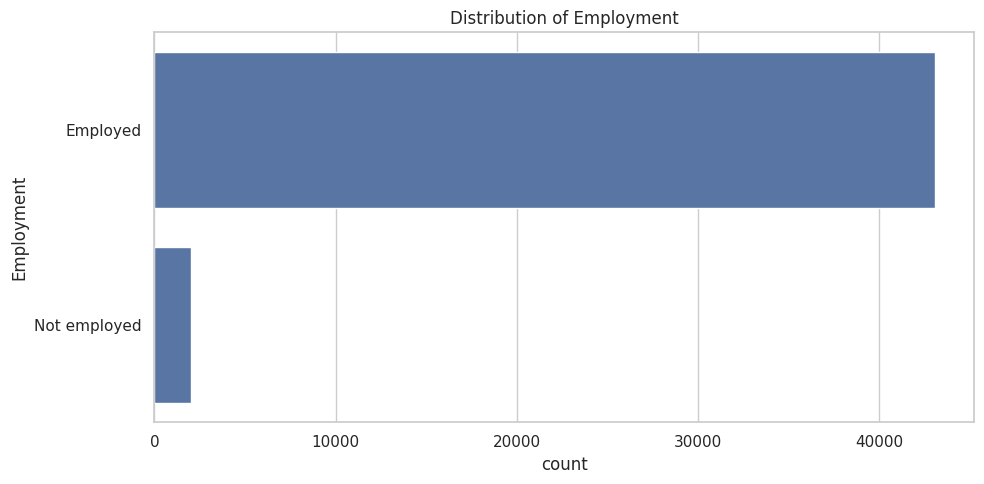

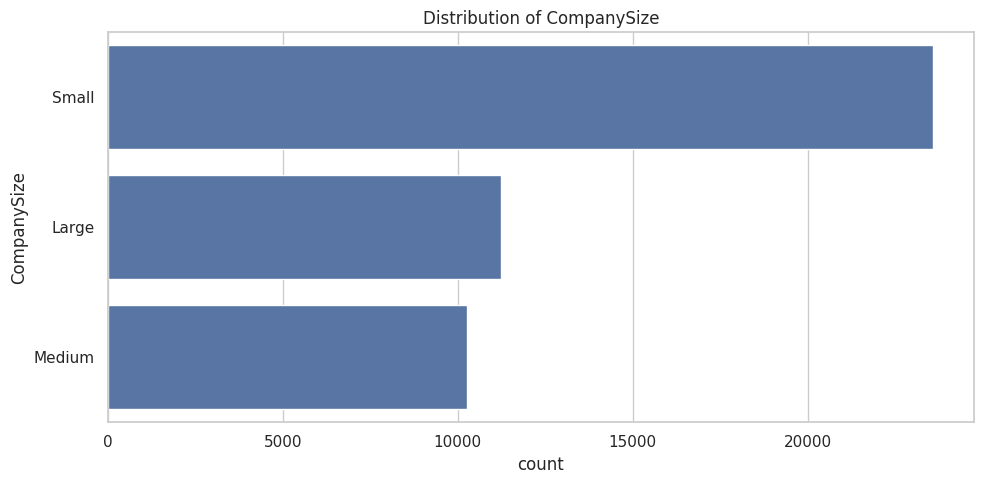

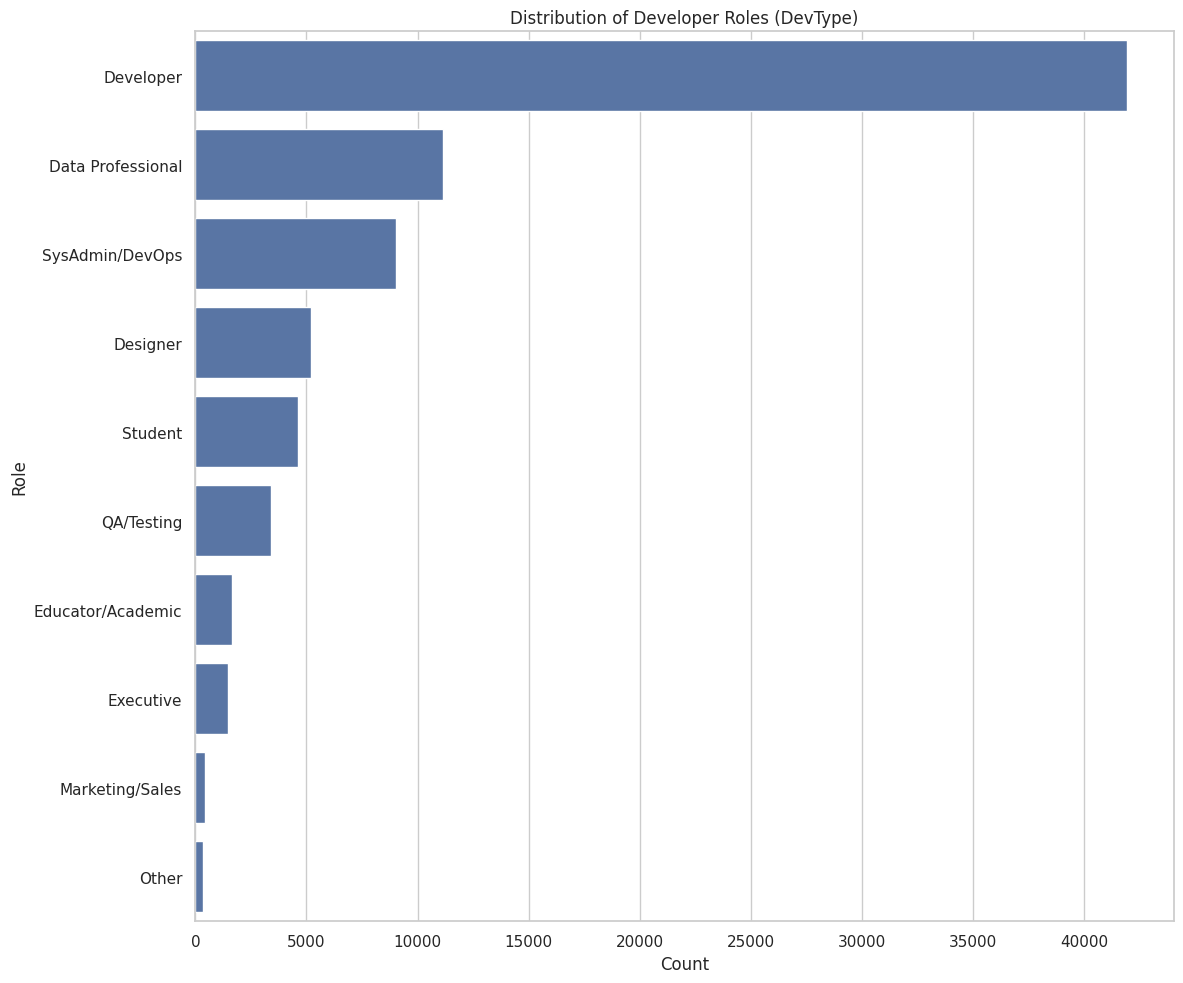

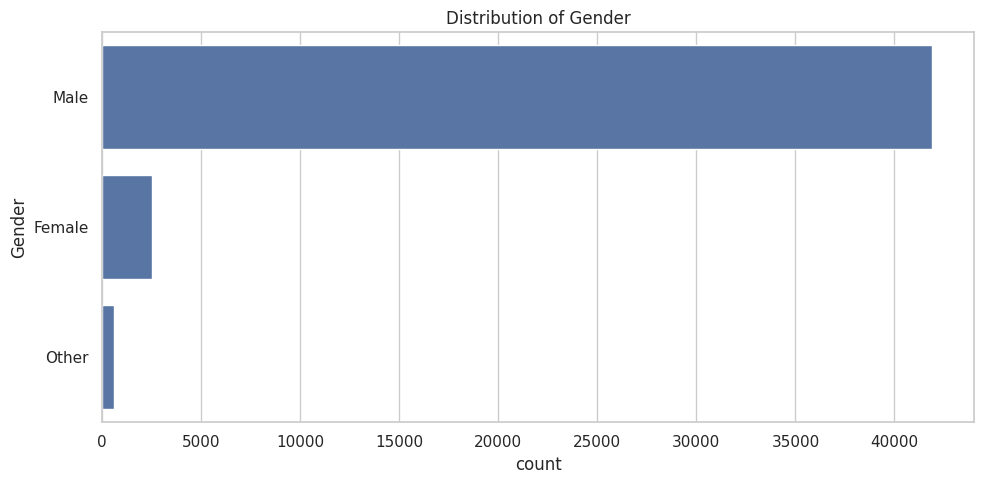

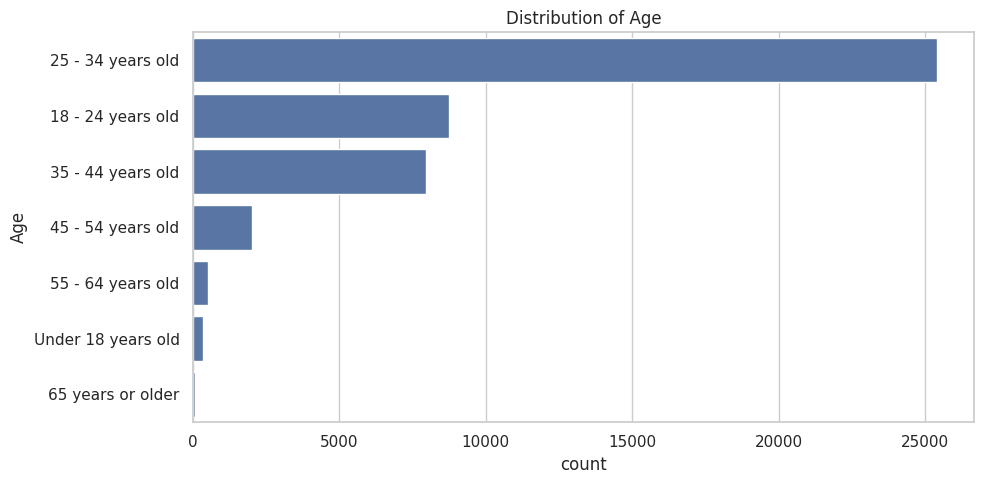

In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical Features Distribution:")

for col in categorical_cols:
    if col == 'Country':
        # Plot the distribution of cleaned 'Country'
        plt.figure(figsize=(10, 8))  # Increased figure size for clearer plotting
        sns.countplot(y=df['Country'], order=df['Country'].value_counts().index)
        plt.title("Distribution of Countries (Top 60 + Other)")
        plt.tight_layout()
        plt.show()

    elif col == 'DevType':
        # Split multi-response DevType values and count individually
        all_roles = df['DevType'].dropna().str.split(';')
        flat_roles = [role.strip() for sublist in all_roles for role in sublist]
        role_counts = Counter(flat_roles)

        roles_df = pd.DataFrame(role_counts.items(), columns=['Role', 'Count'])
        roles_df = roles_df.sort_values(by='Count', ascending=False)

        plt.figure(figsize=(12, 10))
        sns.barplot(y='Role', x='Count', data=roles_df)
        plt.title("Distribution of Developer Roles (DevType)")
        plt.tight_layout()
        plt.show()

    else:
        # Countplot for other categorical variables
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

In [30]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])



Correlation Heatmap:


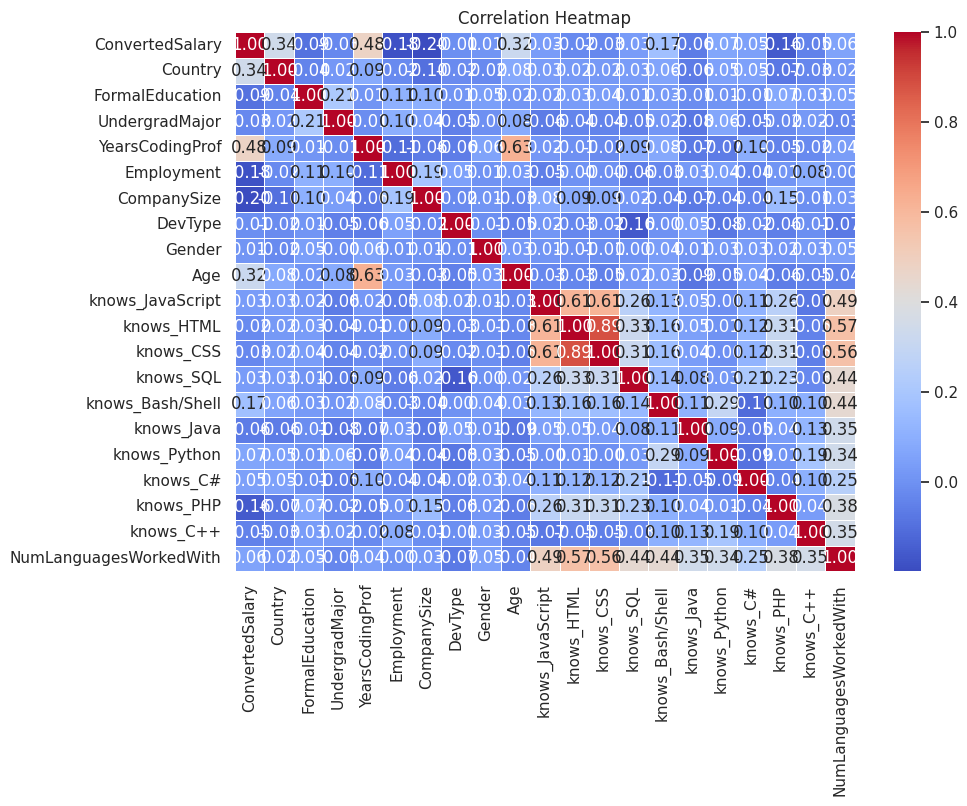

In [31]:
# Correlation Heatmap for numeric features
print("\nCorrelation Heatmap:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


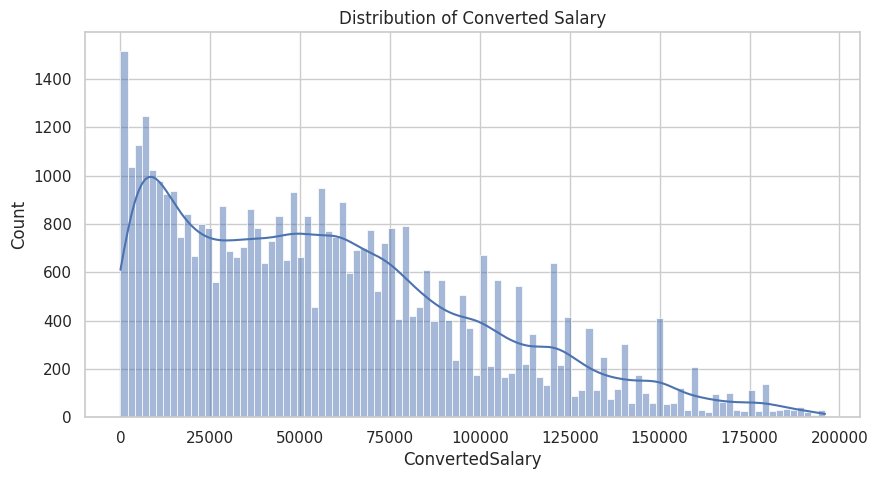

In [32]:
# Target variable distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['ConvertedSalary'], bins=100, kde=True)
plt.title("Distribution of Converted Salary")
plt.show()


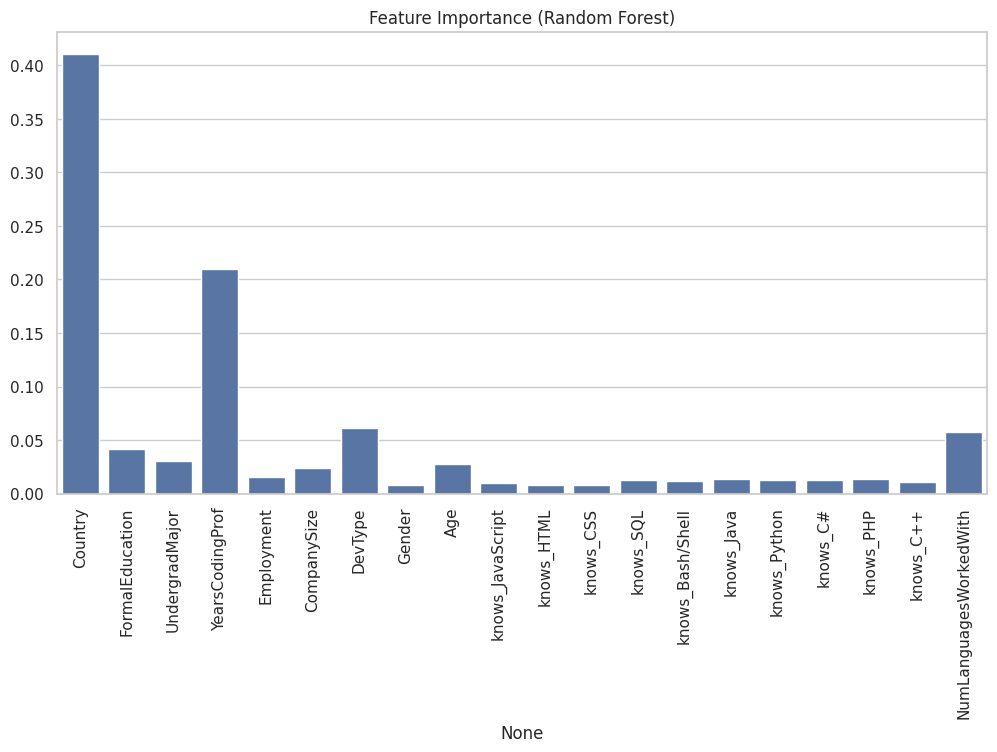

In [33]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor

X = df.drop('ConvertedSalary', axis=1)
y = df['ConvertedSalary']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Visualizing feature importances
features = X.columns
importances = rf.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importances)
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


# Feature selection and model building

In [34]:
from sklearn.model_selection import train_test_split

# Assuming df['ConvertedSalary'] is the target variable and all others are features
X = df.drop('ConvertedSalary', axis=1)
y = df['ConvertedSalary']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 36055, Testing set size: 9014


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)


In [36]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 717839607.4049859
R-squared: 0.6081363731551142


In [67]:
# Pick one random sample from the test set
random_index = np.random.randint(0, len(X_test))
sample_input = X_test.iloc[[random_index]]
actual_salary = y_test.iloc[random_index]

# Predict the salary
predicted_salary = rf_model.predict(sample_input)[0]

# Print the comparison
print("Test Case Index:", random_index)
print("Actual Salary: ${:,.2f}".format(actual_salary))
print("Predicted Salary: ${:,.2f}".format(predicted_salary))
print("Difference: ${:,.2f}".format(abs(predicted_salary - actual_salary)))

Test Case Index: 7818
Actual Salary: $102,000.00
Predicted Salary: $101,424.39
Difference: $575.61
